In [55]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.path import Path

<Figure size 432x288 with 0 Axes>

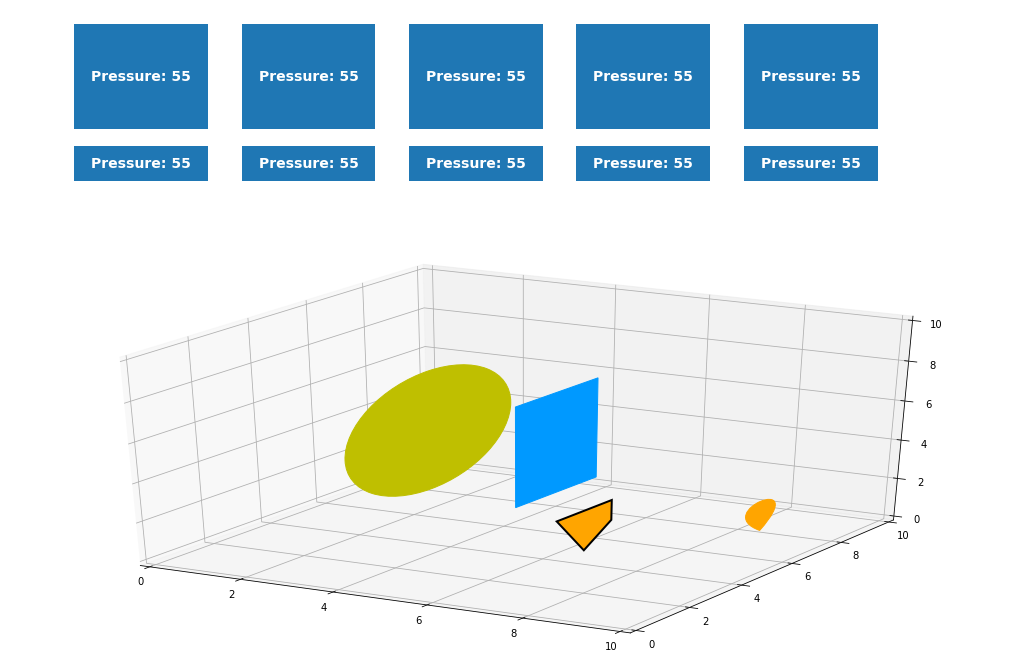

In [94]:
fig = plt.figure(figsize=(18,12))

gs = fig.add_gridspec(3, 3)




##################################


ax1 = fig.add_subplot(gs[0, :])

rectangles = {'Info1' : mpl.patches.Rectangle((2,1), 4, 2),
              'Info2'  : mpl.patches.Rectangle((2,4), 4, 6),
              'Info3'   : mpl.patches.Rectangle((7,1), 4, 2),
              'Info4'  : mpl.patches.Rectangle((7,4), 4, 6),
              'Info5' : mpl.patches.Rectangle((12,1), 4, 2),
              'Info6'  : mpl.patches.Rectangle((12,4), 4, 6),
              'Info7'   : mpl.patches.Rectangle((17,1), 4, 2),
              'Info8'  : mpl.patches.Rectangle((17,4), 4, 6),
              'Info9'   : mpl.patches.Rectangle((22,1), 4, 2),
              'Info10'  : mpl.patches.Rectangle((22,4), 4, 6),
             }


dict1 = {'Info1': 'Pressure: {}'.format(55),
         'Info2': 'Pressure: {}'.format(55),
         'Info3': 'Pressure: {}'.format(55),
         'Info4': 'Pressure: {}'.format(55),
         'Info5': 'Pressure: {}'.format(55),
         'Info6': 'Pressure: {}'.format(55),
         'Info7': 'Pressure: {}'.format(55),
         'Info8': 'Pressure: {}'.format(55),
         'Info9': 'Pressure: {}'.format(55),
         'Info10': 'Pressure: {}'.format(55), 
        }


for r in rectangles:
    ax1.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    ax1.annotate(dict1[r], (cx, cy), color='w', weight='bold', 
                fontsize=14, ha='center', va='center')

ax1.set_xlim((0, 30))
ax1.set_ylim((0, 11))
# ax1.set_aspect('equal')

ax1.axis('off')



############################################   SECONDA RIGA



# ax = fig.add_subplot(312, gridspec_kw={'width_ratios': [2, 1]}, projection='3d')
# ax = fig.add_subplot(212, projection='3d')

ax = fig.add_subplot(gs[1:, :], projection='3d')

p = Circle((5, 5), 3, color='y')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=3, zdir="x")


rect3 = mpl.patches.Rectangle((3,3), 3, 5, color='#0099FF')
ax.add_patch(rect3)
art3d.pathpatch_2d_to_3d(rect3, z=6, zdir="x")

############

verts = [
    (2, 2), # left, bottom
    (3, 3), # left, top
    (3, 4), # right, top
    (1, 4), # right, bottom
    (2, 2), # ignored
    ]
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]
path_comm = Path(verts, codes)
patch = mpl.patches.PathPatch(path_comm, facecolor='orange', lw=2)
ax.add_patch(patch)
art3d.pathpatch_2d_to_3d(patch, z=8, zdir="x")

############

verts = [
    (5, 2), # left, bottom
    (7, 4), # left, top
    (3, 4), # right, top
    (5, 2), # right, bottom
    (5, 2), # ignored
    ]
codes = [Path.MOVETO,
         Path.CURVE4,
         Path.LINETO,
         Path.CURVE4,
         Path.CLOSEPOLY,
         ]
path_comm = Path(verts, codes)
patch = mpl.patches.PathPatch(path_comm, color='orange')  # color= with no boundary facecolor= withboundary
ax.add_patch(patch)
art3d.pathpatch_2d_to_3d(patch, z=10, zdir="x")

#################


ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)



##################

plt.show()





In [19]:
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)



ValueError: Argument Z must be 2-dimensional.

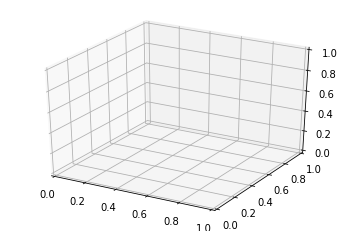

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

R = np.linspace(0, 5, 100)
h = np.linspace(0, 1, 100)
u = np.linspace(0,  2*np.pi, 100)

x = np.outer(R, np.cos(u))
y = np.outer(R, np.sin(u))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,h) # z in case of disk which is parallel to XY plane is constant and you can directly use h
fig.show()